In [29]:
import helper
import plotting

import warnings
warnings.filterwarnings("ignore")

In [30]:
PATH = ["F:/cellpose/fh/"]
MOD_DIR = "F:/cellpose/fh/train/models/"

## Predict masks for dataset

In [31]:
all_results = helper.prediction.batch_predict(MOD_DIR,PATH,mute=True,return_results=True)

fh found...


F:/cellpose/fh//train/: 100%|██████████| 6/6 [00:21<00:00,  3.64s/image]


fh_boosted found...


F:/cellpose/fh//train/: 100%|██████████| 6/6 [00:37<00:00,  6.24s/image]


fh_boosted_2 found...


F:/cellpose/fh//train/: 100%|██████████| 6/6 [00:22<00:00,  3.74s/image]


### Inspect segmentation in images

In [47]:
imgs,lbls,preds = helper.evaluate.dataset_loader(PATH,label_str='mask',pred_str='fh_pred')
_,_,preds_boosted = helper.evaluate.dataset_loader(PATH,label_str='mask',pred_str='boosted_pred')
_,_,preds_boosted_2 = helper.evaluate.dataset_loader(PATH,label_str='mask',pred_str='boosted_2')

## Evaluate segmentation performance

In [36]:
filters={'edge':[True,.05],'px_cutoff':[True,10]}

In [49]:
#set paths
#imgs,lbls,preds = helper.eval.dataset_loader(PATH, label_str='mask',pred_str='boosted_pred')
#eval mAP @ IoU
eval_results = helper.evaluate.eval_set(imgs,lbls,preds,dataID='FH',filters=filters)
eval_results_boosted = helper.evaluate.eval_set(imgs,lbls,preds_boosted,dataID='FH_boosted',filters=filters)
eval_results_boosted_2 = helper.evaluate.eval_set(imgs,lbls,preds_boosted,dataID='FH_boosted_2',filters=filters)

### Plot segmentation performance

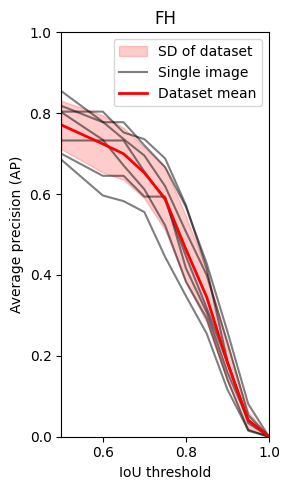

In [56]:
plotting.segmentation.AP_IoU_plot(eval_results,title='FH');

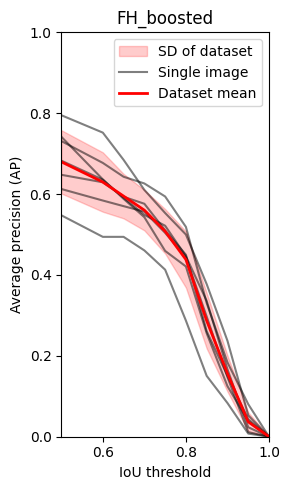

In [57]:
plotting.segmentation.AP_IoU_plot(eval_results_boosted,title='FH_boosted');

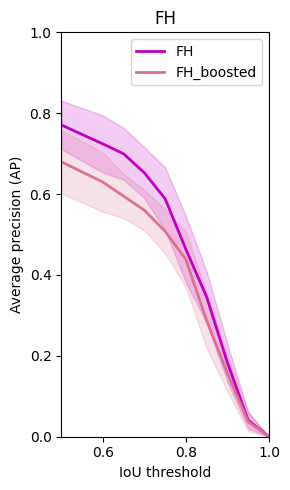

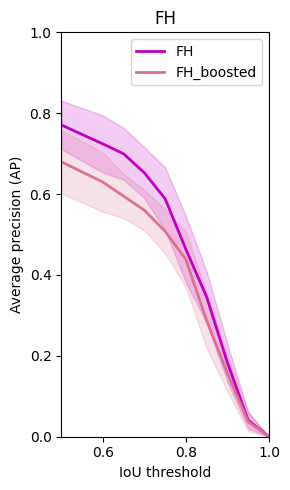

In [53]:
elem = {
    'dataset':'FH',
    'model_ID':['FH','FH_boosted'],
    'colors':['m','palevioletred'],
    'images':False,
    'SD':True,
    'avg_model':True
    }
plotting.segmentation.AP_IoU_summary_plot([eval_results,eval_results_boosted],elem);